# CH07

## 07-1 인공신경망
`인공 신경망` `텐서플로` `밀집층` `원-핫 인코딩`

<font color="red">런타임 유형 GPU로 바꾸기</font>

### 패션 MNIST

In [59]:
import pandas as pd

# 데이터 불러오기
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')

train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

train_input = train_df.drop('label', axis=1).to_numpy().reshape(-1, 28, 28)
train_target = train_df['label'].to_numpy()

test_input = test_df.drop('Unnamed: 0', axis=1).to_numpy().reshape(-1, 28, 28)

In [60]:
# 크기 확인 (디버깅용)
print("train_input shape before reshape:", train_input.shape)

# reshape
train_input = train_input.reshape(-1, 28, 28)

# 정규화
train_input = train_input / 255.0

# 확인
print("train_input shape after reshape:", train_input.shape)

train_input shape before reshape: (42000, 28, 28)
train_input shape after reshape: (42000, 28, 28)


In [61]:
# 데이터 크기 확인
print(train_input.shape, train_target.shape)

(42000, 28, 28) (42000,)


In [62]:
# 테스트 셋 크기 확인
print(test_input.shape)

(18000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

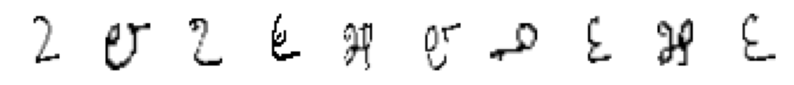

In [63]:
# 훈련 데이터에서 샘플 그림 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range (10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show

! 기존 코드
```python
print([train_target[i] for i in range(10)])
```
실행 시
`np.uint8(*)`형태로 출력 됨 -> `int`형으로 자료형 명시하여 해결.  

---

| 레이블       | 0     | 1    | 2      | 3     | 4    | 5    | 6    | 7        | 8    | 9        |
|--------------|-------|------|--------|-------|------|------|------|----------|------|----------|
| 패션 아이템  | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클 부츠 |

In [64]:
# 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력
print([int(train_target[i]) for i in range(10)])

[7, 8, 7, 6, 5, 8, 2, 6, 5, 6]


In [65]:
# unique() 함수로 레이블 당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4202, 4196, 4177, 4246, 4232, 4177, 4193, 4228, 4180, 4169]))


### 로지스틱 회귀로 패션 아이템 분류하기

In [66]:
# reshape() 메서드를 사용해 2차원 배열인 각 샘플을 1차원 배열로 펼치기
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [67]:
# 변환된 train_scaled 크기 확인
print(train_scaled.shape)

(42000, 784)


In [68]:
# SGDClassifier 클래스와 cross_validate 함수를 사용해 교차 검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn. linear_model import SGDClassifier

#loss='log'는 최신 scikit-learn 버전에서는 **'log_loss'**로 바뀜
sc = SGDClassifier(loss='log_loss', max_iter=15, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.2767857142857143


In [58]:
# SDGClassifier 반복 횟수 변경
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.2767857142857143


### 인공 신경망

#### 텐서플로와 케라스

케라스: 텐서플로의 고수준 API

In [24]:
import tensorflow as tf

In [25]:
from tensorflow import keras

### 인공 신경망으로 모델 만들기

In [26]:
# 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [27]:
print(train_scaled. shape, train_target.shape)

(33600, 784) (33600,)


In [28]:
print(val_scaled.shape, val_target.shape)

(8400, 784) (8400,)


In [29]:
# 밀집층 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# 밀집층을 가진 신경망 모델 만들기
# 에러 코드: model = keras.Sequential(dense)

model = keras.Sequential([dense])

### 인공 신경망으로 패션 아이템 분류하기

In [31]:
# 케라스 모델 손실 함수 종류 및 측정값 지정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# 패션 MNIST 데이터의 타깃값 확인
print(train_target[:10])

[0 9 6 4 6 5 4 6 2 9]


In [34]:
# 모델 훈련, 5회 반복
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8738 - loss: 2.1212
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8782 - loss: 2.0884
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8732 - loss: 2.0552
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8759 - loss: 2.0244
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8818 - loss: 1.9921


In [50]:
# 모델 성능 확인
model.evaluate(val_scaled, val_target)

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.5014


[0.4696870446205139, 0.844589114189148]

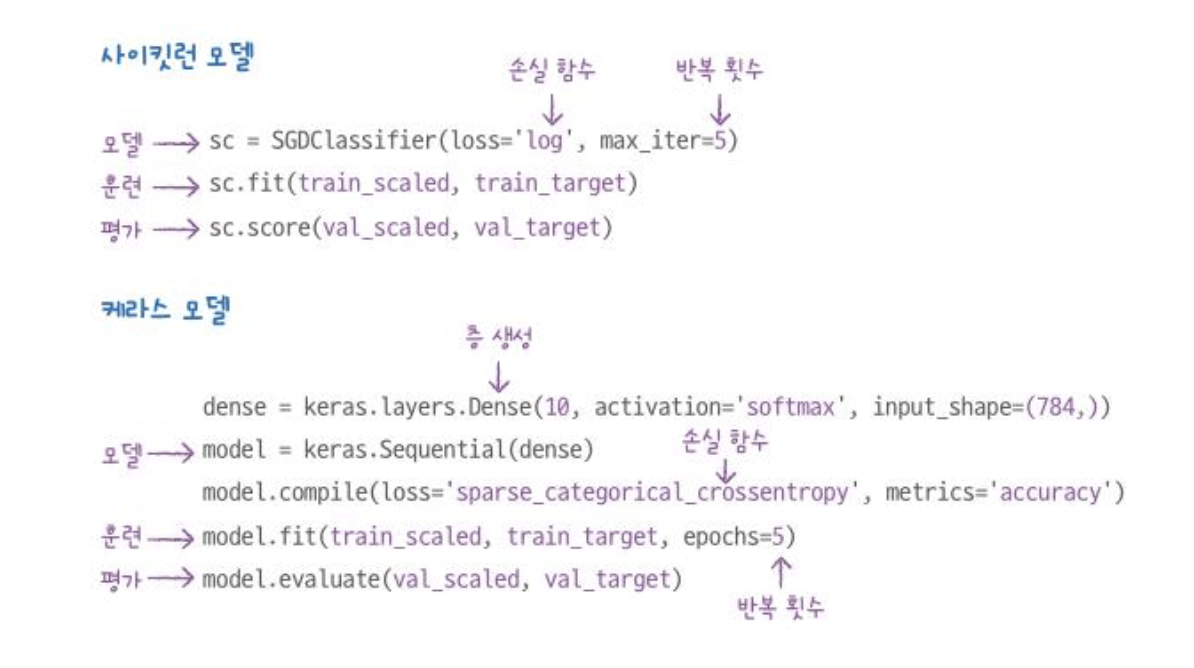

In [51]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img3.png'))

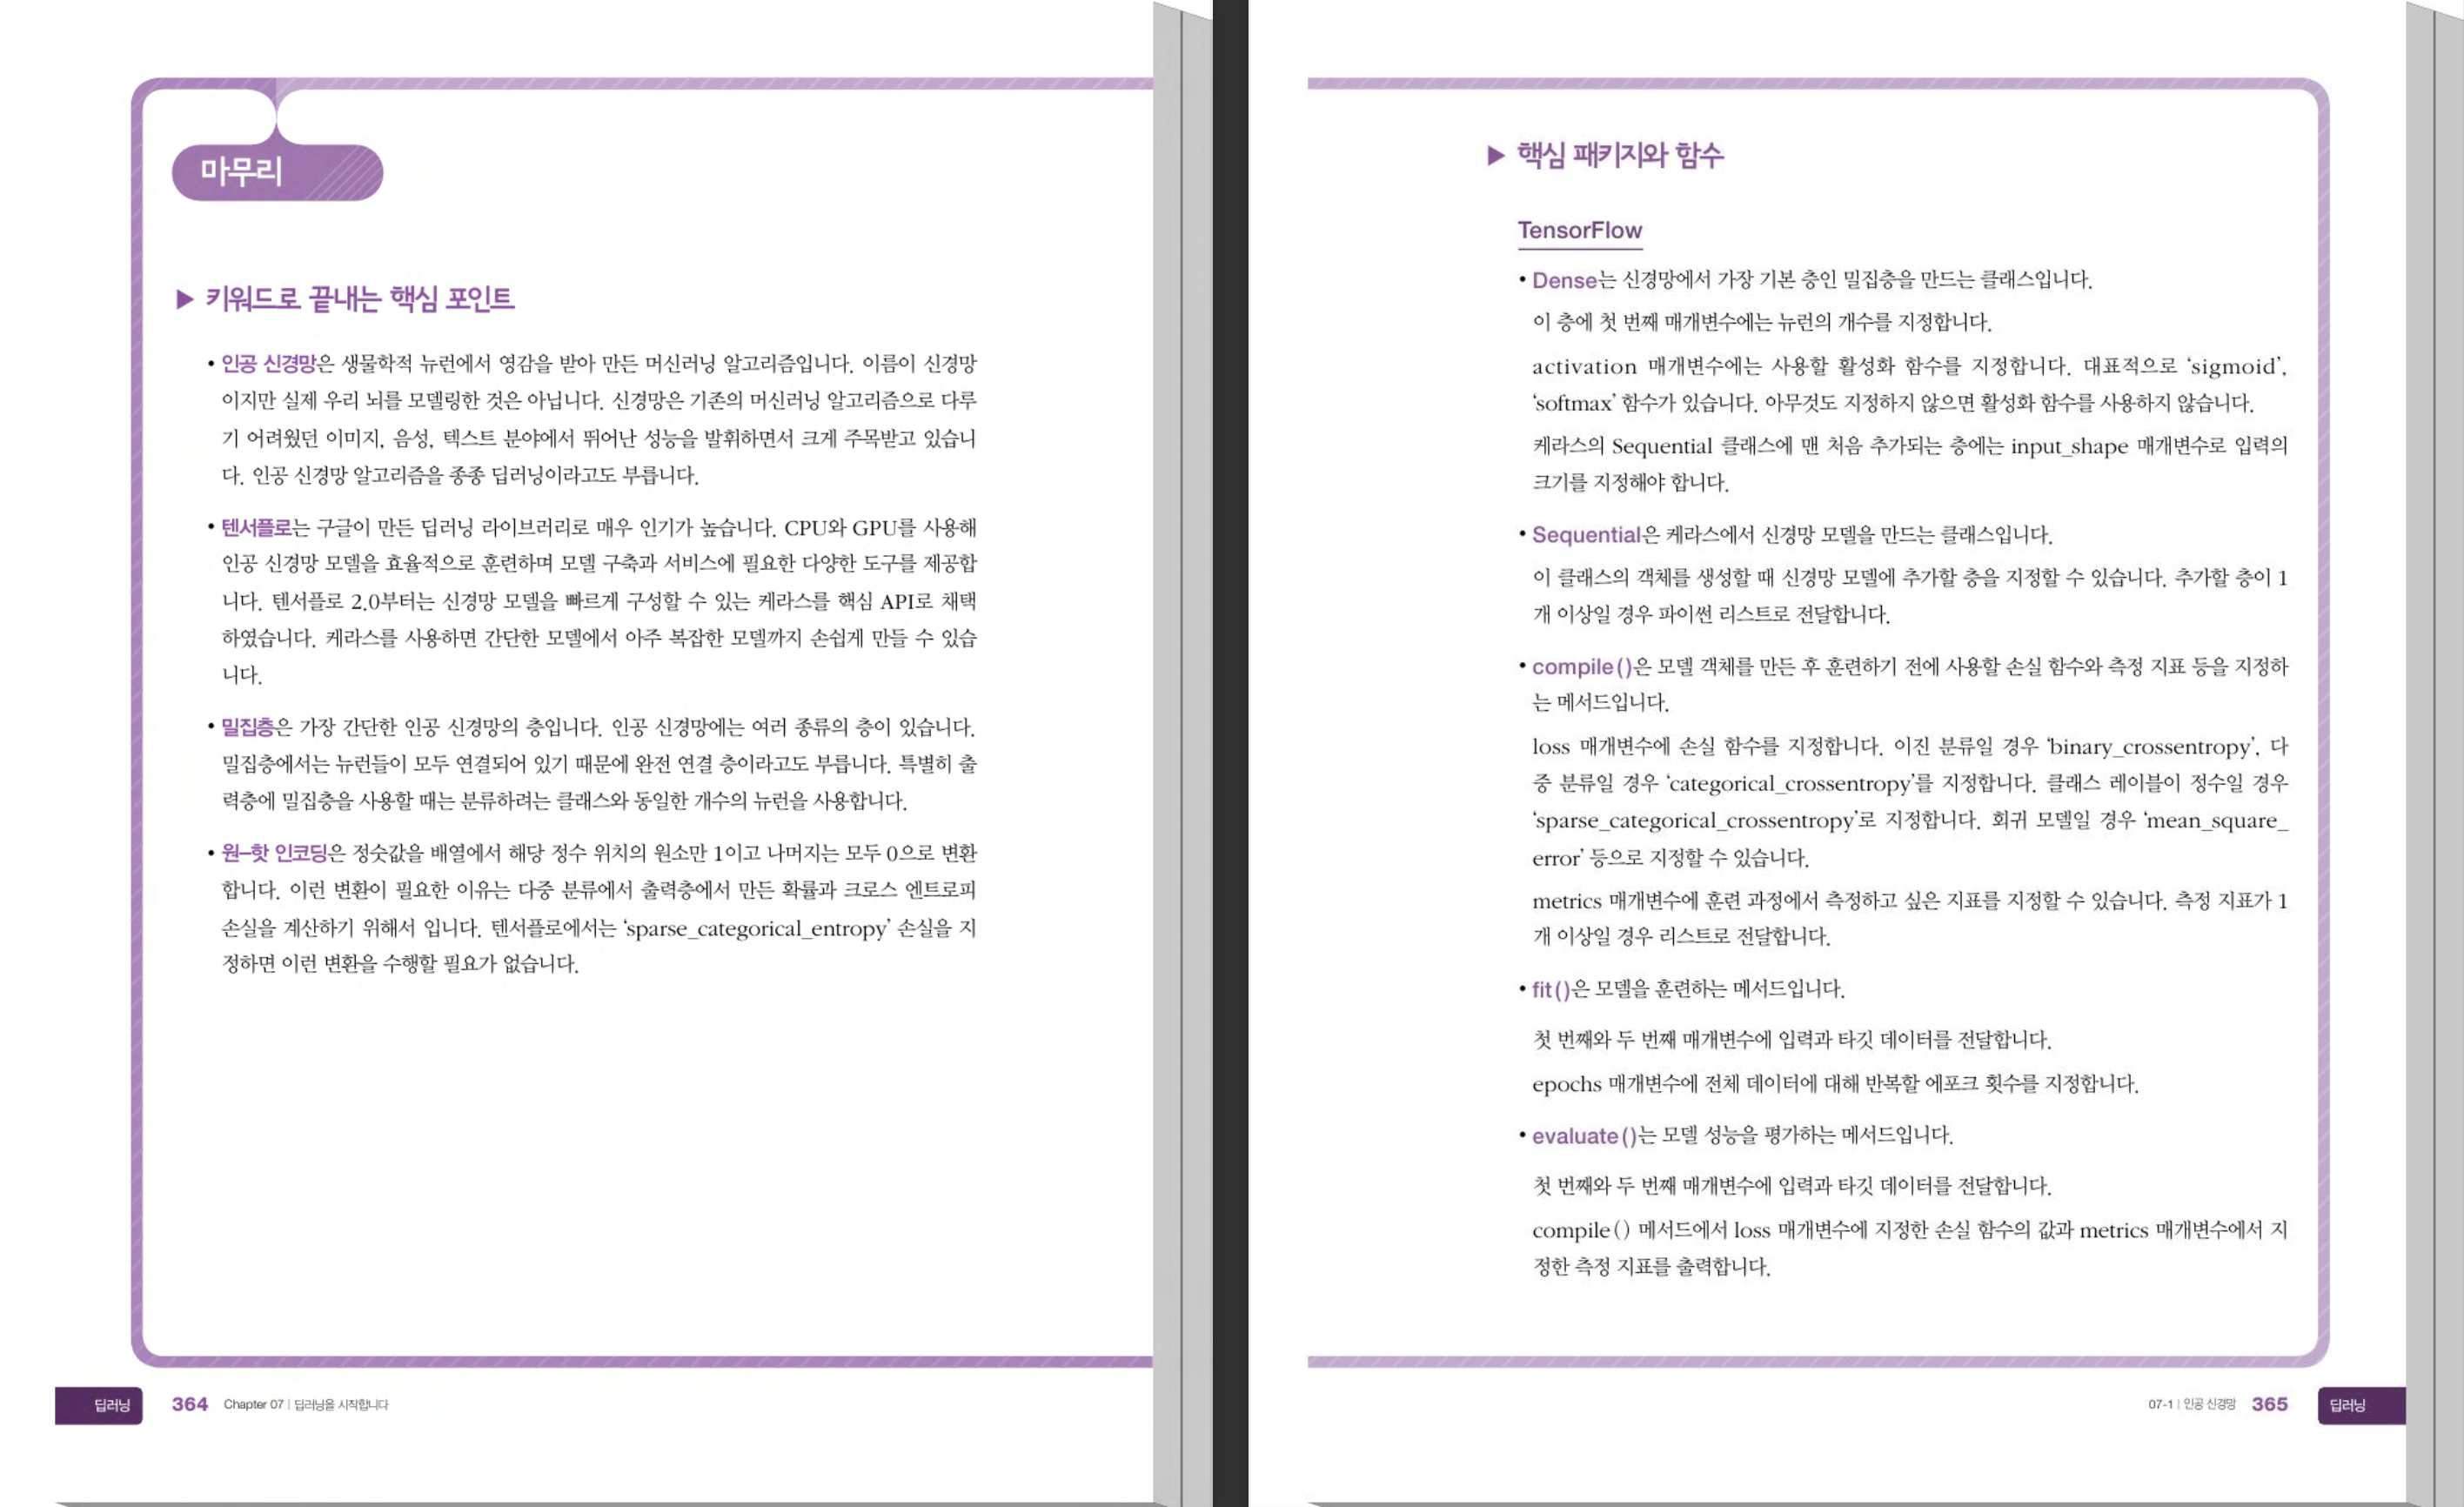

In [87]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img5.png'))

## 07-2 심층 신경망
`심층 신경망` `렐루 함수` `옵티마이저`

#### 2 개의 층

In [54]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [55]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
train_scaled, train_target, test_size=0.2, random_state=42)

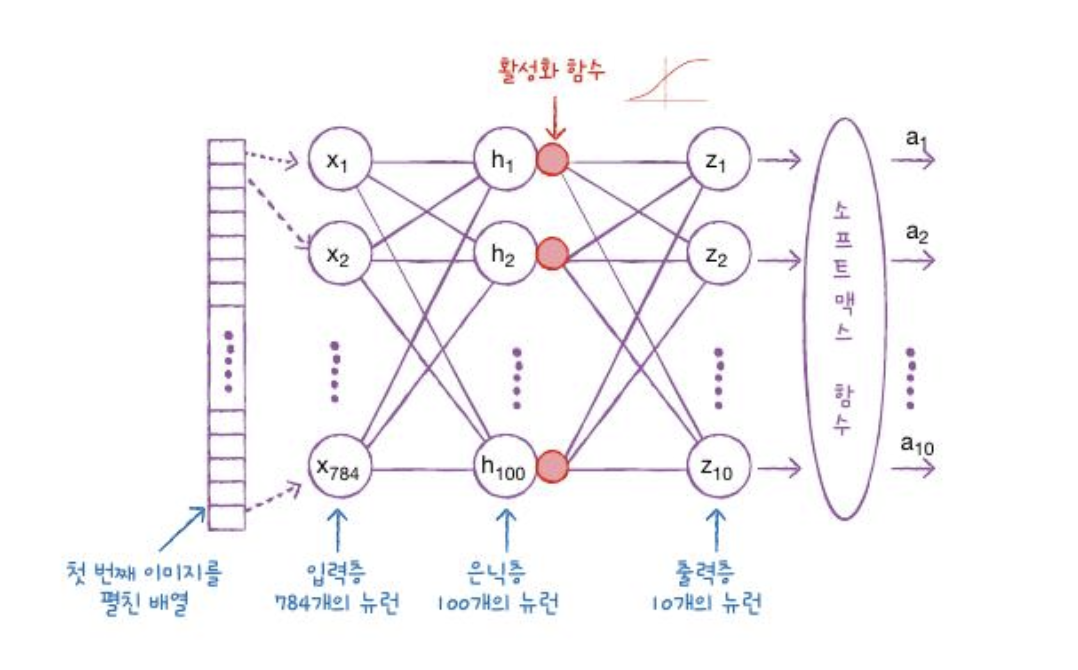

In [60]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/Img4.png'))

은닉층: 입력층과 출력층 사이에 있는 모든 층

In [61]:
# dense1: 은닉층, 100개의 뉴런을 가진 밀집층
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# dense2: 출력층, 10개의 뉴런
dense2 = keras.layers.Dense(10, activation='softmax')

#### 심층 신경망 만들기

In [64]:
# 출력층을 가장 마지막에 둬야함을 주의!
model = keras.Sequential([dense1, dense2])

In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Output Shape (샘플 개수, 은닉층 뉴런 개수)

#### 층을 추가하는 다른 방법

In [66]:
# Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만들기
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# 층 추가
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7620 - loss: 0.7525
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8472 - loss: 0.4253
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3784
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8742 - loss: 0.3490
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8765 - loss: 0.3385


#### 렐루 함수

In [75]:
# Flatten 층은 입력층 바로 뒤에 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# reshape() 메서드 적용 안한 모델 훈련
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 0~255 픽셀값을 0~1로 정규화
train_scaled = train_input / 255.0

# 검증 세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


In [79]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7581 - loss: 0.6844
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.3996
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8725 - loss: 0.3558
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8827 - loss: 0.3250
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.3228


In [80]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8758 - loss: 0.3565


[0.3572334349155426, 0.8735833168029785]

#### 옵티마이저

**옵티마이저(Optimizer)**   
모델이 정답에 가까운 값을 예측할 수 있도록 가중치를 조금씩 조정해주는 도구, 경사 하강법 알고리즘
- `compile()`에서 `optimizer=`로 지정
- 종류: `SGD`, `RMSprop`, `Adam` 등
- 학습률 같은 하이퍼파라미터도 조절 가능

In [81]:
# Adam 활동 패션 MNIST 모델 훈련
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7671 - loss: 0.6698
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8608 - loss: 0.3954
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8680 - loss: 0.3603
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.3237
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8883 - loss: 0.3049


In [83]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3687


[0.3687959909439087, 0.8663333058357239]

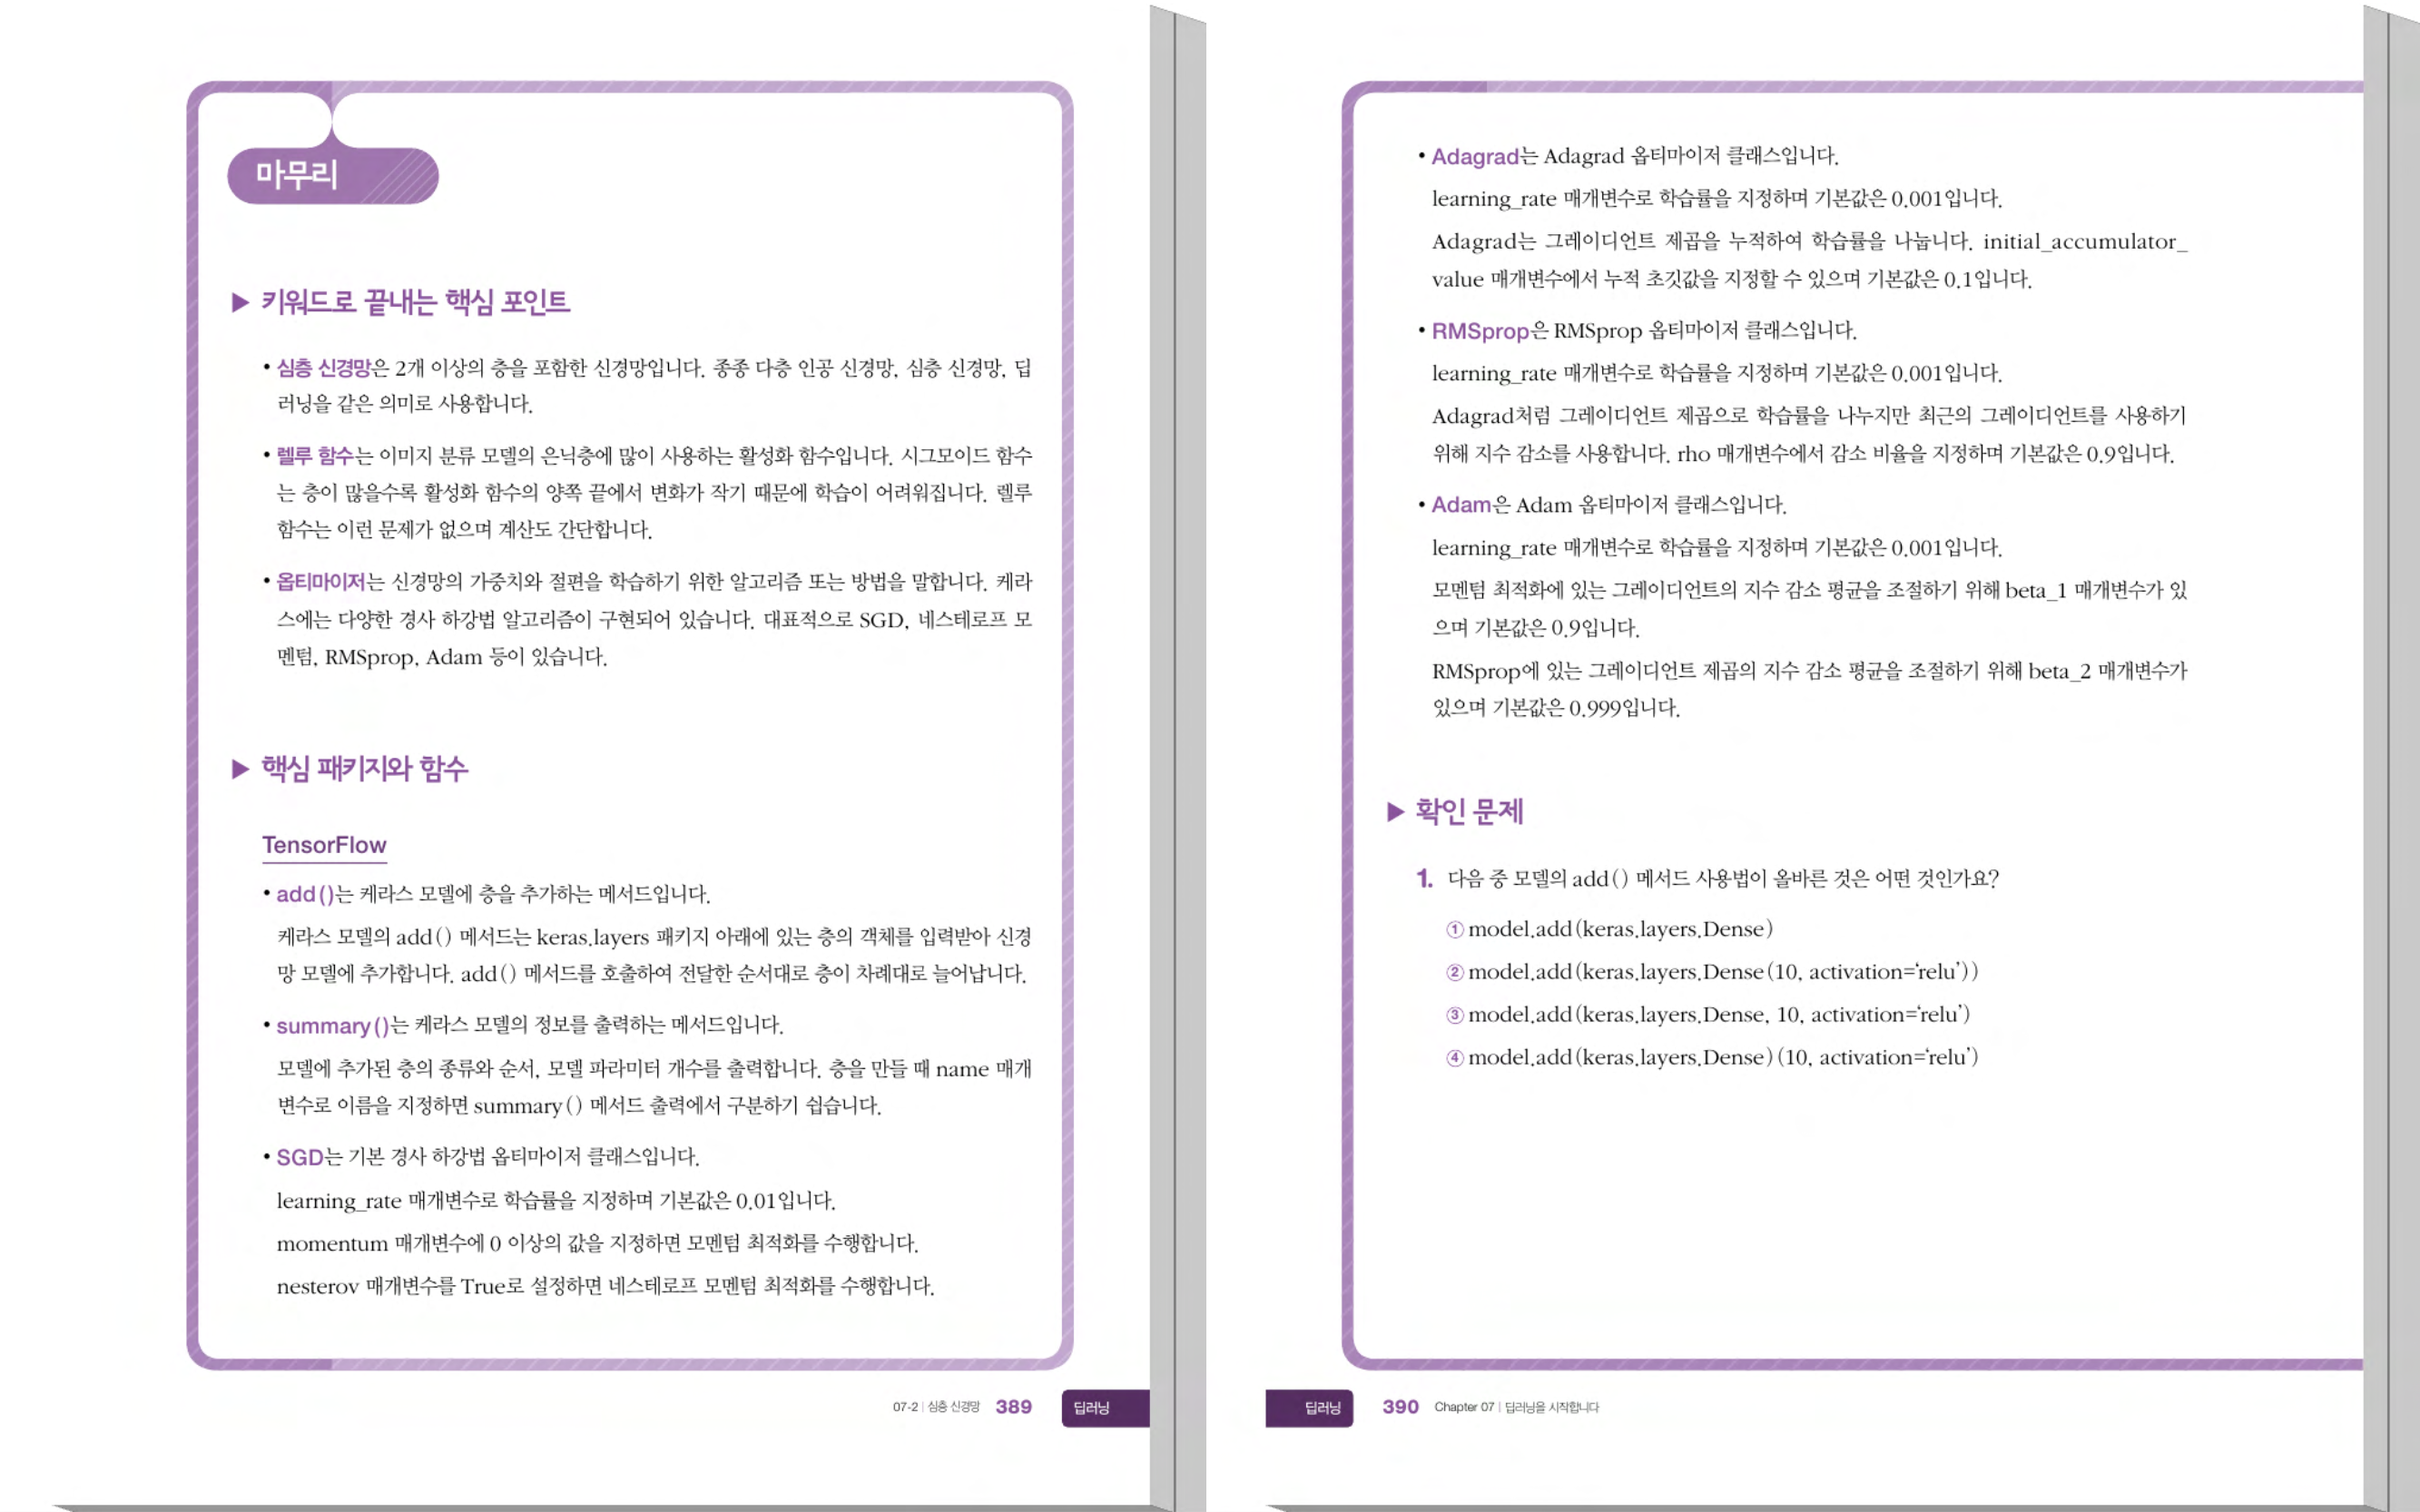

In [85]:
display(Image('/content/drive/MyDrive/DArtB_5th/MLDL/img6.png'))